In [112]:
import os
import cv2
import numpy as np
import pandas as pd
import pydicom as pyd
from tqdm import tqdm
import seaborn as sns
from  PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
path = "Data/rsna-pneumonia-detection-challenge/stage_2_train_images/"

In [3]:
ds = pyd.dcmread("Data/rsna-pneumonia-detection-challenge/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm")

In [4]:
pyd.read_file("Data/rsna-pneumonia-detection-challenge/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm")

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [5]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [6]:
ds.PatientID

'0004cfab-14fd-4e49-80ba-63a80b6bddd6'

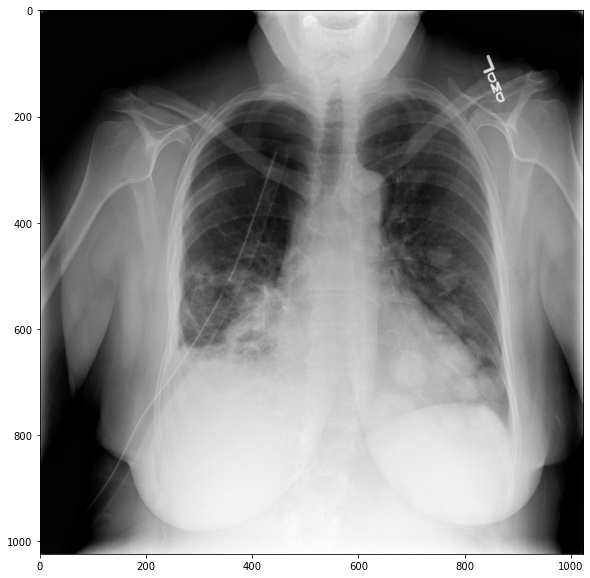

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(ds.pixel_array, cmap='gray')

In [8]:
pat_dat = {'patientId':[], 'ViewPosition': [], 'Age':[], 'Sex':[]}

for dcm in tqdm(os.listdir(path)):
    pat = pyd.dcmread(f"{path}{dcm}", stop_before_pixels=True)
    pat_dat['patientId'].append(pat.PatientID)
    pat_dat['ViewPosition'].append(pat.ViewPosition)
    pat_dat['Age'].append(pat.PatientAge)
    pat_dat['Sex'].append(pat.PatientSex)

100%|████████████████████████████████████████████████████████████████████████████| 26684/26684 [06:12<00:00, 71.71it/s]


In [12]:
pat_dat = pd.DataFrame(pat_dat)

In [13]:
pat_dat

patientId ViewPosition Age Sex
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6           PA  51   F
1      000924cf-0f8d-42bd-9158-1af53881a557           AP  19   F
2      000db696-cf54-4385-b10b-6b16fbb3f985           AP  25   F
3      000fe35a-2649-43d4-b027-e67796d412e0           AP  40   M
4      001031d9-f904-4a23-b3e5-2c088acd19c6           PA  57   M
...                                     ...          ...  ..  ..
26679  fffb2395-8edd-4954-8a89-ffe2fd329be3           AP  46   M
26680  fffba05a-1635-4545-9bbd-57ad4cfe8d27           PA  31   M
26681  fffc95b5-605b-4226-80ab-62caec682b22           AP  30   F
26682  fffcff11-d018-4414-971a-a7cefa327795           PA  47   M
26683  fffec09e-8a4a-48b1-b33e-ab4890ccd136           AP  45   M

[26684 rows x 4 columns]

In [14]:
det_class_info = pd.read_csv('Data/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')

In [15]:
det_class_info

patientId                         class
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4      00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity
...                                     ...                           ...
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8                  Lung Opacity
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba                        Normal
30224  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity

[30227 rows x 2 columns]

In [16]:
det_class_info['class'].value_counts(dropna=False)

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [17]:
train_label_dat = pd.read_csv("Data/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv")

In [18]:
train_label_dat

patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN   
2      00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    NaN    NaN    NaN     NaN   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    NaN    NaN    NaN     NaN   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
30222       1  
30223       0  
30224       0  
30225       1  
30226       1  

[30227 rows x 6 columns]

In [19]:
all_dat = pd.merge(left=det_class_info, right=train_label_dat, how='left', left_index=True, right_index=True)

In [20]:
all_dat

patientId_x                         class  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal   
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal   
4      00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity   
...                                     ...                           ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8                  Lung Opacity   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba                        Normal   
30224  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   

                                patientId_y      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN   
2      00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    NaN    NaN    NaN     NaN   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    NaN    NaN    NaN     NaN   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
30222       1  
30223       0  
30224       0  
30225       1  
30226       1  

[30227 rows x 8 columns]

In [21]:
det_class_info.shape

(30227, 2)

In [22]:
all_dat.drop('patientId_y', axis=1, inplace=True)

In [23]:
all_dat.rename(columns={'patientId_x':'patientId'}, inplace=True)

In [24]:
all_dat = pd.merge(left=all_dat, right=pat_dat, how='left', left_on='patientId', right_on='patientId')

In [25]:
all_dat

patientId                         class  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal   
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal   
4      00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity   
...                                     ...                           ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8                  Lung Opacity   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba                        Normal   
30224  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   

           x      y  width  height  Target ViewPosition Age Sex  
0        NaN    NaN    NaN     NaN       0           PA  51   F  
1        NaN    NaN    NaN     NaN       0           PA  48   F  
2        NaN    NaN    NaN     NaN       0           AP  19   M  
3        NaN    NaN    NaN     NaN       0           PA  28   M  
4      264.0  152.0  213.0   379.0       1           AP  32   F  
...      ...    ...    ...     ...     ...          ...  ..  ..  
30222  185.0  298.0  228.0   379.0       1           AP  54   M  
30223    NaN    NaN    NaN     NaN       0           PA  46   F  
30224    NaN    NaN    NaN     NaN       0           PA  45   M  
30225  570.0  393.0  261.0   345.0       1           AP  72   F  
30226  233.0  424.0  201.0   356.0       1           AP  72   F  

[30227 rows x 10 columns]

In [26]:
all_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patientId     30227 non-null  object 
 1   class         30227 non-null  object 
 2   x             9555 non-null   float64
 3   y             9555 non-null   float64
 4   width         9555 non-null   float64
 5   height        9555 non-null   float64
 6   Target        30227 non-null  int64  
 7   ViewPosition  30227 non-null  object 
 8   Age           30227 non-null  object 
 9   Sex           30227 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.5+ MB


In [29]:
all_dat['class'].value_counts(dropna=False)

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [30]:
all_dat.patientId.nunique()

26684

In [31]:
all_dat[(all_dat['class']=='No Lung Opacity / Not Normal')|(all_dat['class']=='Normal')].shape

(20672, 10)

In [32]:
all_dat[(all_dat['class']=='No Lung Opacity / Not Normal')|(all_dat['class']=='Normal')].patientId.nunique()

20672

In [33]:
all_dat[(all_dat['class']=='Lung Opacity')].patientId.nunique()

6012

In [56]:
all_dat[(all_dat['class']=='Lung Opacity')].groupby('patientId').size().describe()

count    6012.000000
mean        1.589321
std         0.542800
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
dtype: float64

In [58]:
all_dat[(all_dat['class']=='Lung Opacity')].groupby('patientId').count().describe()

class            x            y        width       height  \
count  6012.000000  6012.000000  6012.000000  6012.000000  6012.000000   
mean      1.589321     1.589321     1.589321     1.589321     1.589321   
std       0.542800     0.542800     0.542800     0.542800     0.542800   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       2.000000     2.000000     2.000000     2.000000     2.000000   
75%       2.000000     2.000000     2.000000     2.000000     2.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

            Target  ViewPosition          Age          Sex  
count  6012.000000   6012.000000  6012.000000  6012.000000  
mean      1.589321      1.589321     1.589321     1.589321  
std       0.542800      0.542800     0.542800     0.542800  
min       1.000000      1.000000     1.000000     1.000000  
25%       1.000000      1.000000     1.000000     1.000000  
50%       2.000000      2.000000     2.000000     2.000000  
75%       2.000000      2.000000     2.000000     2.000000  
max       4.000000      4.000000     4.000000     4.000000

In [31]:
all_dat[(all_dat['class']=='Lung Opacity')].groupby('patientId').size().value_counts()

2    3266
1    2614
3     119
4      13
dtype: int64

In [27]:
all_dat = all_dat.astype({'Age':int})

In [63]:
all_dat.groupby('patientId').Age.mean(['unique']).describe()

count    26684.000000
mean        47.030018
std         16.810578
min          1.000000
25%         34.000000
50%         49.000000
75%         59.000000
max        155.000000
Name: Age, dtype: float64

(array([1.132e+03, 4.370e+03, 6.946e+03, 9.265e+03, 4.542e+03, 4.240e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <BarContainer object of 10 artists>)

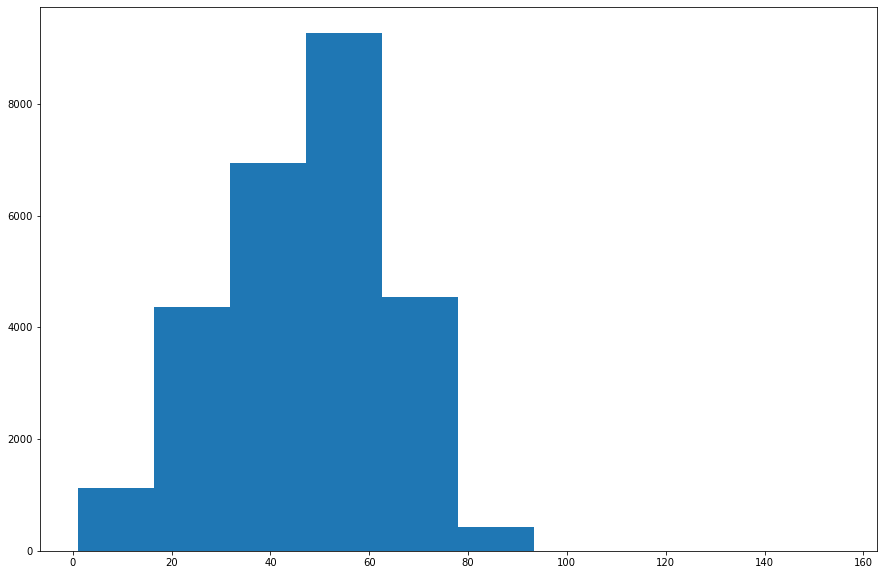

In [75]:
plt.figure(figsize=(15,10))
plt.hist(all_dat.groupby('patientId').Age.mean(['unique']))

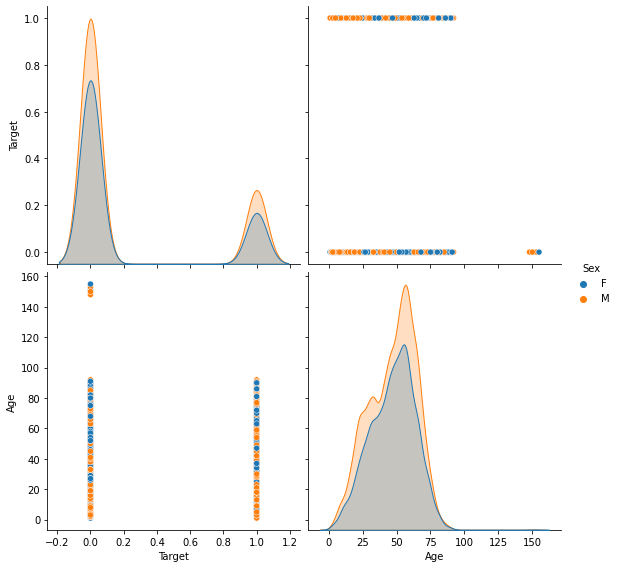

In [77]:
sns.pairplot(all_dat.drop_duplicates(subset = 'patientId'), vars=['Target', 'Age'], hue='Sex', height=4)

In [78]:
AP = pd.Series(name = 'AP', data=all_dat.groupby(['patientId', 'ViewPosition']).size().unstack(fill_value=0).value_counts().unstack().iloc[:,0])

In [81]:
AP

AP
0       NaN
1    9173.0
2    2888.0
3     100.0
4      12.0
Name: AP, dtype: float64

In [84]:
PA = pd.Series(name = 'PA', data=all_dat.groupby(['patientId', 'ViewPosition']).size().unstack(fill_value=0).value_counts().unstack().iloc[0,:])

In [85]:
PA

PA
0        NaN
1    14113.0
2      378.0
3       19.0
4        1.0
Name: PA, dtype: float64

In [94]:
all_dat[all_dat.Target==0].drop_duplicates(subset='patientId').ViewPosition.value_counts()

PA    13163
AP     7509
Name: ViewPosition, dtype: int64

In [96]:
PA[0] = all_dat[all_dat.Target==0].drop_duplicates(subset='patientId').ViewPosition.value_counts()[0]

In [97]:
AP[0] = all_dat[all_dat.Target==0].drop_duplicates(subset='patientId').ViewPosition.value_counts()[1]

In [99]:
PA[1] = PA[1]-PA[0]

In [100]:
AP[1] = AP[1]-AP[0]

<AxesSubplot:>

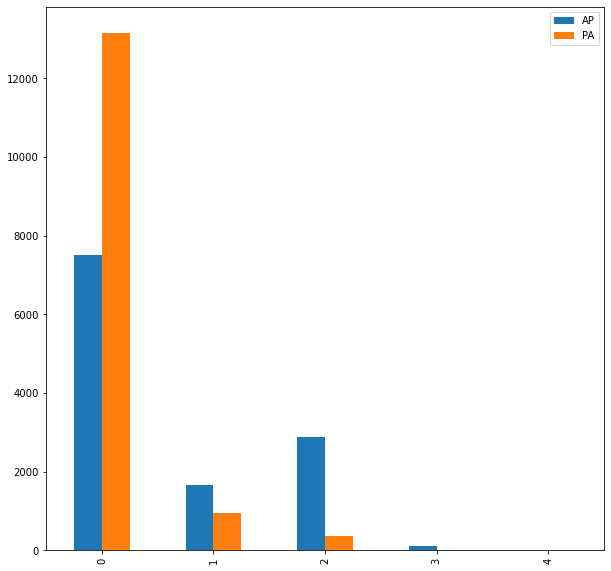

In [102]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
APPA = pd.DataFrame([AP, PA]).T
APPA.plot(kind='bar', ax = ax)

In [198]:
all_dat.groupby('patientId').size().count()

26684

In [210]:
all_dat.groupby('patientId')

In [211]:
all_dat

patientId                         class  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal   
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal   
4      00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity   
...                                     ...                           ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8                  Lung Opacity   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba                        Normal   
30224  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   

           x      y  width  height  Target ViewPosition  Age Sex  
0        NaN    NaN    NaN     NaN       0           PA   51   F  
1        NaN    NaN    NaN     NaN       0           PA   48   F  
2        NaN    NaN    NaN     NaN       0           AP   19   M  
3        NaN    NaN    NaN     NaN       0           PA   28   M  
4      264.0  152.0  213.0   379.0       1           AP   32   F  
...      ...    ...    ...     ...     ...          ...  ...  ..  
30222  185.0  298.0  228.0   379.0       1           AP   54   M  
30223    NaN    NaN    NaN     NaN       0           PA   46   F  
30224    NaN    NaN    NaN     NaN       0           PA   45   M  
30225  570.0  393.0  261.0   345.0       1           AP   72   F  
30226  233.0  424.0  201.0   356.0       1           AP   72   F  

[30227 rows x 10 columns]

In [103]:
all_dat.drop_duplicates(subset='patientId').Sex.value_counts()

M    15166
F    11518
Name: Sex, dtype: int64

In [104]:
all_dat.drop_duplicates(subset='patientId').ViewPosition.value_counts()

PA    14511
AP    12173
Name: ViewPosition, dtype: int64

26,684 unique patients.

20,672 unique patients that are Normal / Not Normal / No Lung Opacity.<br>
6012 unique patients that have Lung Opacity.

Data available on upto 4 patches per patient.

In [35]:
def displayScan(patId, directory: 'train|test'='train'):
    patDat: pd.DataFrame
    patDat = all_dat[all_dat.patientId==patId].copy()
    patDat.reset_index(drop=True, inplace=True)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    if directory=='train':
        patDicom = pyd.dcmread(f'Data/rsna-pneumonia-detection-challenge/stage_2_train_images/{patId}.dcm')
    elif directory=='test':
        patDicom = pyd.dcmread(f'Data/rsna-pneumonia-detection-challenge/stage_2_test_images/{patId}.dcm')
    ax.imshow(patDicom.pixel_array, cmap='gray')
    if patDat.Target[0]:
        for index, row in patDat.iterrows():
            rect = patches.Rectangle((row.x, row.y), row.width, row.height, linewidth=3, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    else:
        print(f"The patient is {patDat['class'][0]}")

In [110]:
def displayScanCLAHE(patId, directory: 'train|test'='train'):
    patDat = all_dat[all_dat.patientId==patId].copy()
    patDat.reset_index(drop=True, inplace=True)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    if directory=='train':
        patDicom = pyd.dcmread(f'Data/rsna-pneumonia-detection-challenge/stage_2_train_images/{patId}.dcm')
    elif directory=='test':
        patDicom = pyd.dcmread(f'Data/rsna-pneumonia-detection-challenge/stage_2_test_images/{patId}.dcm')
    bgr = cv2.cvtColor(patDicom.pixel_array, cv2.COLOR_GRAY2BGR)
    lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
    l, a , b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img =  clahe.apply(l) 
    updated_lab_img2 = cv2.merge((clahe_img,a,b))
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
    jpeg_img_fnl = Image.fromarray(CLAHE_img)
    ax.imshow(jpeg_img_fnl)
    if patDat.Target[0]:
        for index, row in patDat.iterrows():
            rect = patches.Rectangle((row.x, row.y), row.width, row.height, linewidth=3, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    else:
        print(f"The patient is {patDat['class'][0]}")

In [36]:
all_dat[all_dat.Target==1].sample(10).patientId.unique()

array(['564eac4e-bec9-4cd6-94cb-cc6ba78983b9',
       '1b7f9ebf-bd1c-4195-9186-d6adb65945ee',
       'b50cbd3a-14cb-46bf-aaff-ae2cdaeef739',
       '3d8a52f8-3769-48d7-9460-2df223a06632',
       '34b11240-350d-4383-a5bb-169bccf1e760',
       '061bb9bf-13c6-4ea0-bd82-5768fb83dff8',
       '4ae0b788-62b6-486c-a95c-76764250c086',
       '5ea7521b-b287-4ddd-ac55-14e05c75d62e',
       'bfe40d11-6e72-4ccd-9fd4-5534402fdabf',
       '2f8bdf8a-af90-43bf-8d5d-0b434cca29f9'], dtype=object)

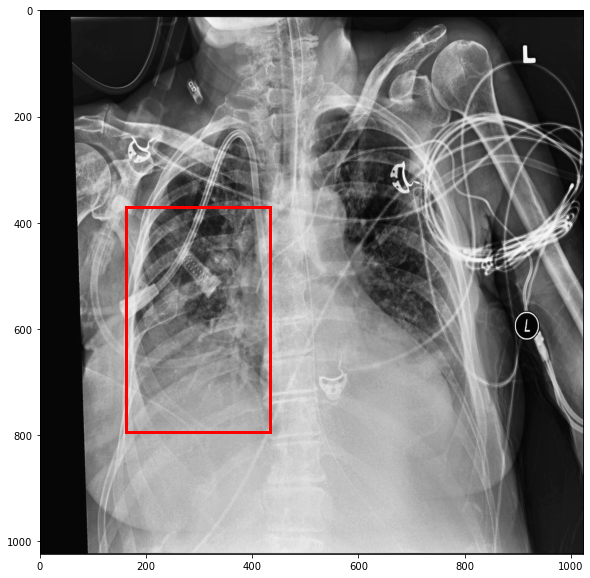

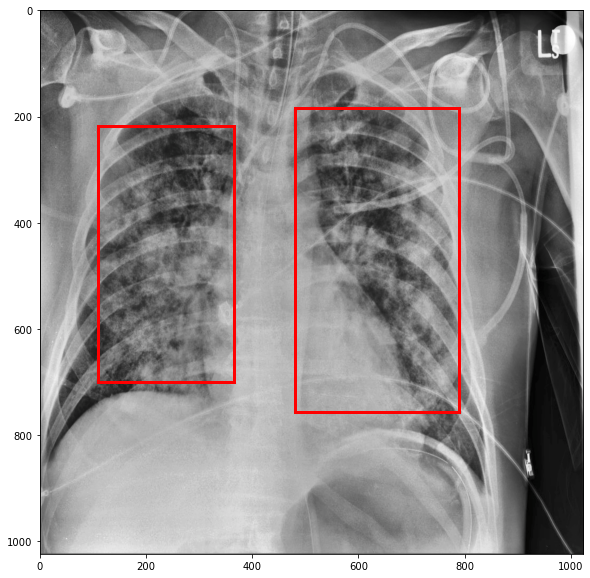

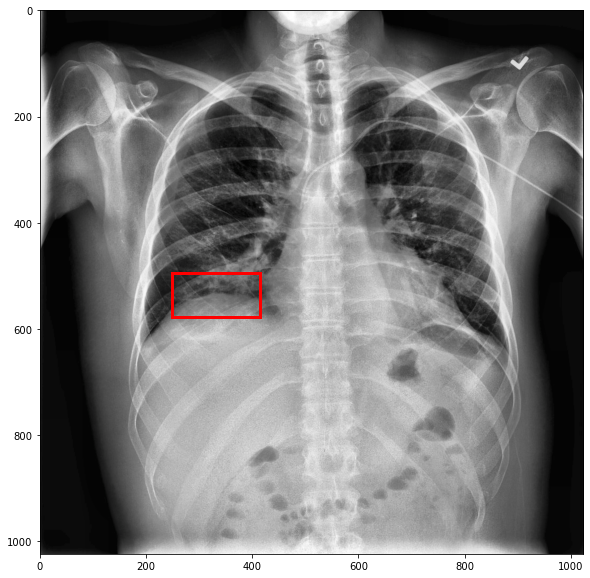

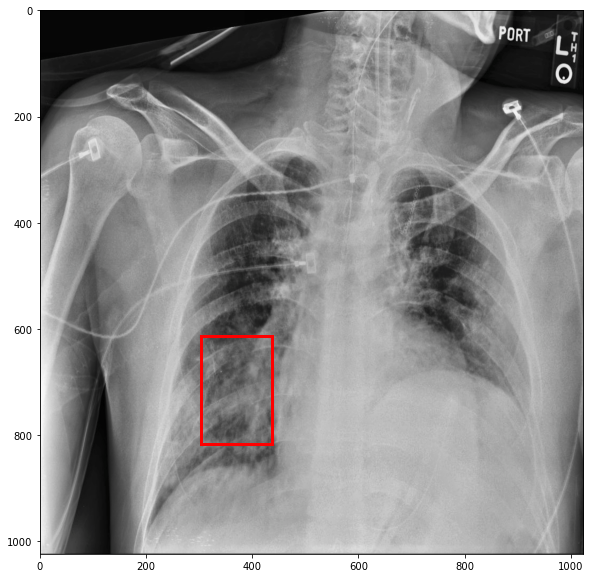

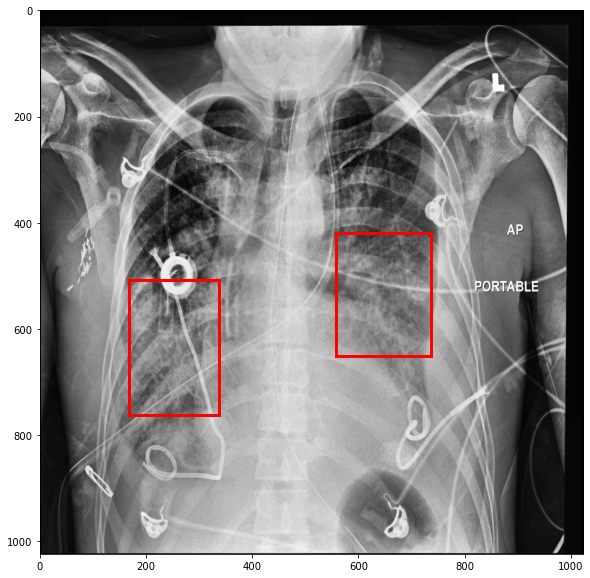

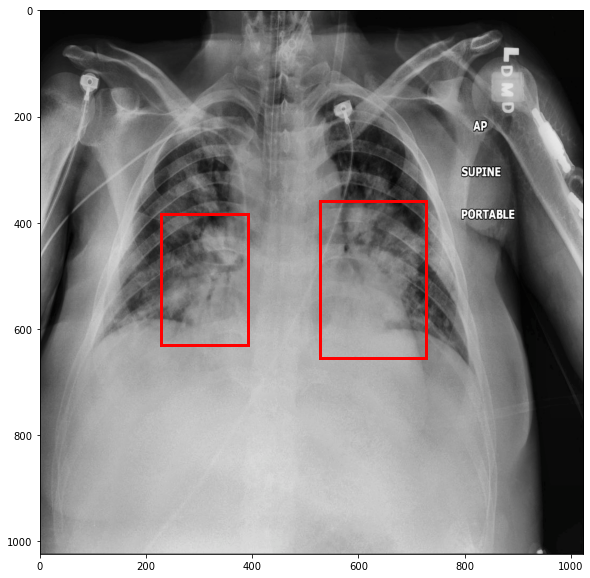

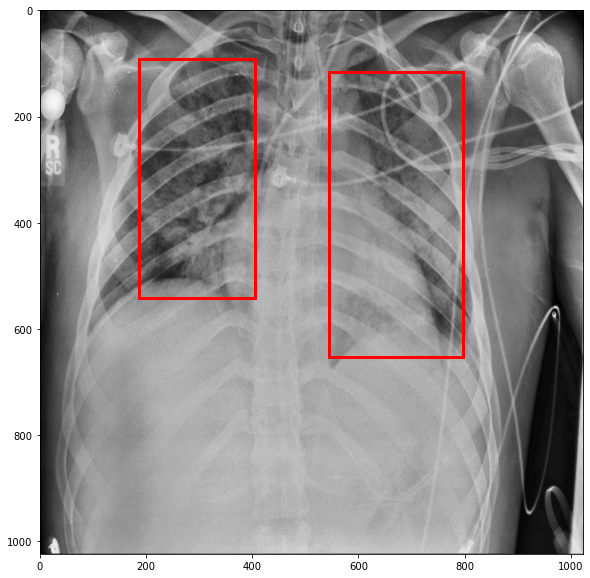

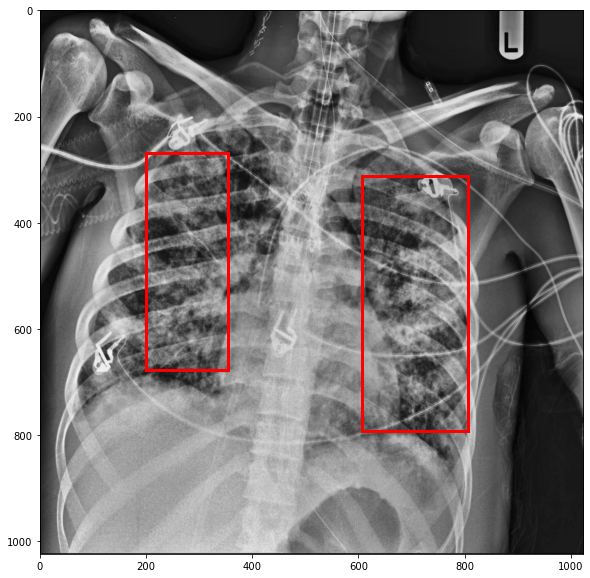

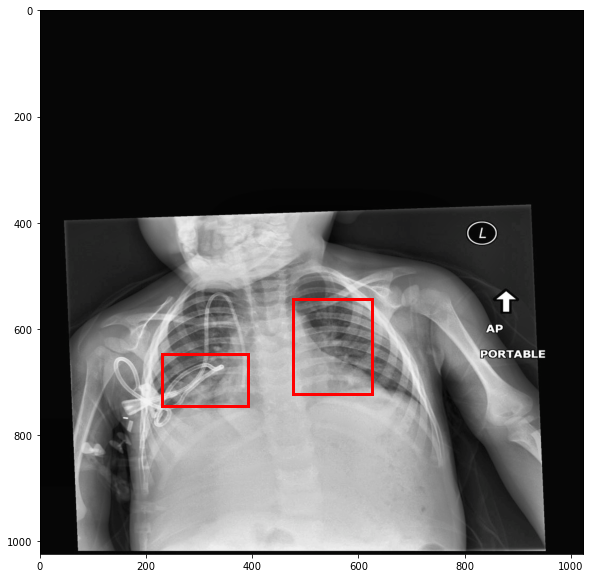

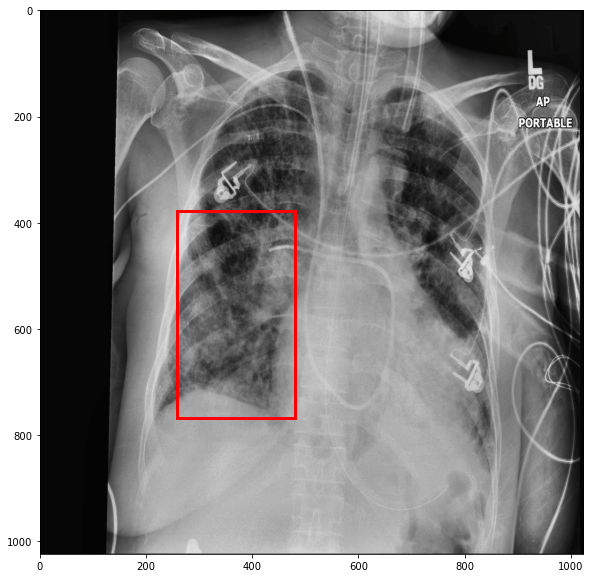

In [120]:
for i in all_dat[(all_dat.Target==1)].sample(10).patientId.unique():
    displayScanCLAHE(i)